Kod je preuzet od FER-a, nadopunjen i modificiran od Šimuna Šopara prema potrebama zadataka.

In [1]:
import numpy as np
import torch

from metric_dataset import MNISTMetricDataset
from simple_embedding import SimpleMetricEmbedding
from matplotlib import pyplot as plt


def get_colormap():
    # Cityscapes colormap for first 10 classes
    colormap = np.zeros((10, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]
    colormap[1] = [244, 35, 232]
    colormap[2] = [70, 70, 70]
    colormap[3] = [102, 102, 156]
    colormap[4] = [190, 153, 153]
    colormap[5] = [153, 153, 153]
    colormap[6] = [250, 170, 30]
    colormap[7] = [220, 220, 0]
    colormap[8] = [107, 142, 35]
    colormap[9] = [152, 251, 152]
    return colormap

= Using device cpu
Fitting PCA directly from images...


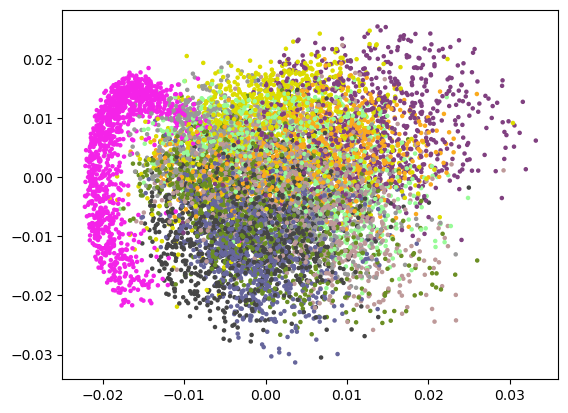

Fitting PCA from feature representation


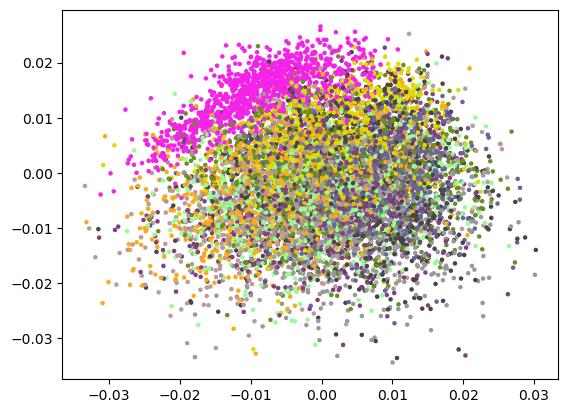

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"= Using device {device}")

emb_size = 32
model = SimpleMetricEmbedding(1, emb_size).to(device)

params = torch.load('model_parameters.pt')
model.load_state_dict(params)


colormap = get_colormap()
mnist_download_root = "./MNIST data"
ds_test = MNISTMetricDataset(mnist_download_root, split='test')
X = ds_test.images
Y = ds_test.targets
print("Fitting PCA directly from images...")
test_img_rep2d = torch.pca_lowrank(ds_test.images.view(-1, 28 * 28), 2)[0]
plt.scatter(test_img_rep2d[:, 0], test_img_rep2d[:, 1], color=colormap[Y[:]] / 255., s=5)
plt.show()
plt.figure()

print("Fitting PCA from feature representation")
with torch.no_grad():
    model.eval()
    test_rep = model.get_features(X.unsqueeze(1))
    test_rep2d = torch.pca_lowrank(test_rep, 2)[0]
    plt.scatter(test_rep2d[:, 0], test_rep2d[:, 1], color=colormap[Y[:]] / 255., s=5)
    plt.show()

= Using device cpu
Fitting PCA directly from images...


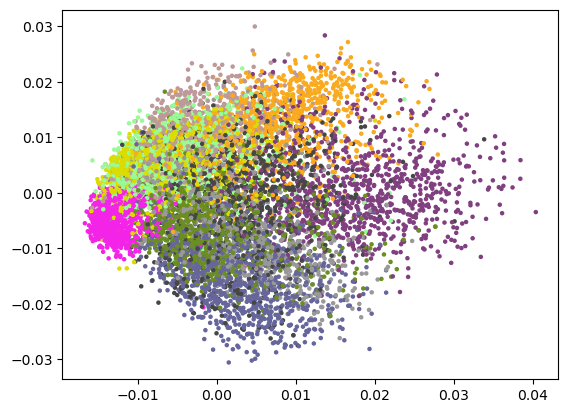

Fitting PCA from feature representation


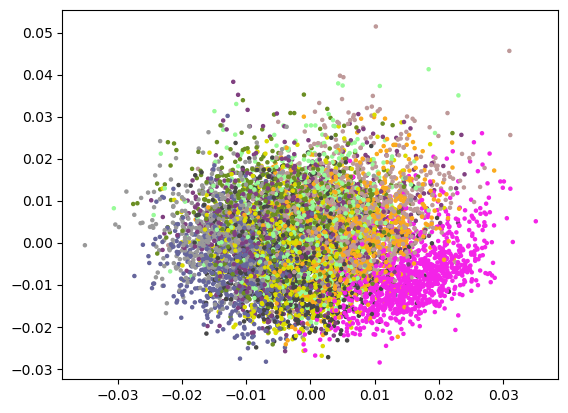

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"= Using device {device}")

emb_size = 32
model = SimpleMetricEmbedding(1, emb_size).to(device)

params = torch.load('model_parameters_missing_0.pt')
model.load_state_dict(params)


colormap = get_colormap()
mnist_download_root = "./MNIST data"
ds_test = MNISTMetricDataset(mnist_download_root, split='test')
X = ds_test.images
Y = ds_test.targets
print("Fitting PCA directly from images...")
test_img_rep2d = torch.pca_lowrank(ds_test.images.view(-1, 28 * 28), 2)[0]
plt.scatter(test_img_rep2d[:, 0], test_img_rep2d[:, 1], color=colormap[Y[:]] / 255., s=5)
plt.show()
plt.figure()

print("Fitting PCA from feature representation")
with torch.no_grad():
    model.eval()
    test_rep = model.get_features(X.unsqueeze(1))
    test_rep2d = torch.pca_lowrank(test_rep, 2)[0]
    plt.scatter(test_rep2d[:, 0], test_rep2d[:, 1], color=colormap[Y[:]] / 255., s=5)
    plt.show()